In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [134]:
timing_data = pd.read_csv("../results/timing_data.csv")
timing_data.head()

,sort,nth_element,max_element,max_element_ben_deane,accumulate,transform_reduce
0,5190.49,9637.74,18185.1,12386.2,5490.10,11714.1
1,4838.23,4140.38,12782.2,16768.0,5545.80,11406.3
2,4355.45,6654.27,12623.2,12227.7,5418.60,11493.4
3,4464.56,2598.69,14997.1,12295.4,5556.15,11896.9
4,5039.92,2835.86,14741.3,12196.8,5611.94,10659.9


In [135]:
centered_data = 1e-3*(timing_data - timing_data.median()); # us to ms
centered_data.head()

,sort,nth_element,max_element,max_element_ben_deane,accumulate,transform_reduce
0,0.187095,4.34422,4.29955,0.0004,0.12684,0.5647
1,-0.165165,-1.15314,-1.10335,4.3822,0.18254,0.2569
2,-0.647945,1.36075,-1.26235,-0.1581,0.05534,0.3440
3,-0.538835,-2.69483,1.11155,-0.0904,0.19289,0.7475
4,0.036525,-2.45766,0.85575,-0.1890,0.24868,-0.4895


(0.0, 30.0)

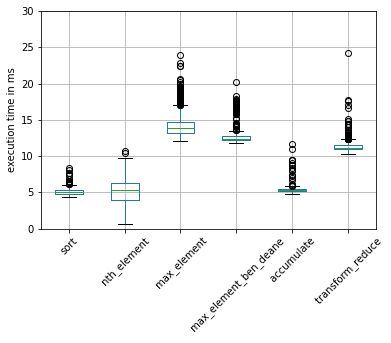

In [142]:
timing_data_ms = 1e-3*timing_data
plt = timing_data_ms.boxplot(rot = 45);
plt.set_ylabel("execution time in ms")
plt.set_ylim([0, 30])

(-5.0, 15.0)

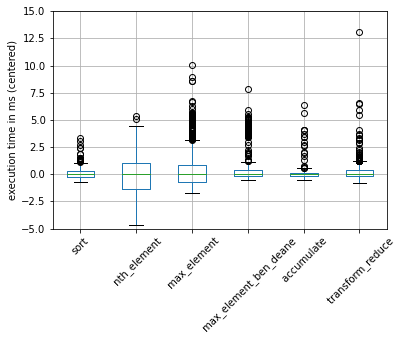

In [146]:
plt = centered_data.boxplot(rot = 45);
plt.set_ylabel("execution time in ms (centered)")
plt.set_ylim([-5, 15])

In [140]:
timing_data.max()*1e-3

sort                       8.32849
 nth_element              10.66370
 max_element              23.94270
 max_element_ben_deane    20.25920
 accumulate               11.71170
 transform_reduce         24.26220
dtype: float64

In [37]:
data_seq = pd.read_csv("../results/comparison_of_algorithms.csv")
data_seq

,size,sort,nth_element,max_element,max_element_ben_deane,accumulate,transform_reduce
0,10,0.000097,0.000105,0.000051,0.000046,0.000023,0.000021
1,100,0.002678,0.000701,0.000145,0.000166,0.000114,0.000296
2,1000,0.041289,0.008328,0.001188,0.001185,0.000600,0.001310
3,3162,0.129322,0.020136,0.004309,0.003549,0.002106,0.004045
4,10000,0.402180,0.052010,0.015397,0.010593,0.006171,0.012153
5,31623,1.463470,0.159258,0.034717,0.033817,0.019421,0.039703
6,100000,5.326680,0.541999,0.115385,0.114834,0.066120,0.131202
7,177828,NaN,1.057840,0.220915,0.211736,0.116412,0.243189
8,316228,NaN,1.835250,0.383300,0.363586,0.261378,0.580336
9,562341,NaN,3.320990,0.674742,0.634858,0.521656,1.130370


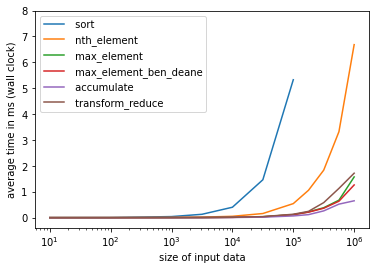

In [40]:
data_seq.plot(x="size", logx=True, xlabel="size of input data", ylabel="average time in ms (wall clock)", ylim=[-0.4, 8]);

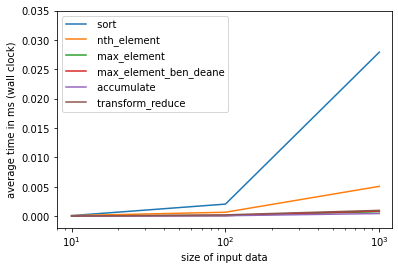

In [171]:
data.iloc[0:3,:].plot(x="size", logx=True, xlabel="size of input data", ylabel="average time in ms (wall clock)", xlim=[8, 1200], ylim=[-0.002, 0.035]);

In [35]:
data_par = pd.read_csv("../results/comparison_of_algorithms_parallel.csv")
data_par

,size,sort,nth_element,max_element,max_element_ben_deane,reduce,transform_reduce
0,10,0.007967,0.005620,0.003268,0.003379,0.000863,0.001276
1,100,0.002356,0.037953,0.014142,0.012348,0.003910,0.003903
2,1000,0.044476,0.120218,0.017818,0.016910,0.007954,0.008310
3,3162,0.060421,0.232846,0.022645,0.023524,0.010420,0.009719
4,10000,0.134189,0.452829,0.033841,0.032263,0.013342,0.014345
5,31623,0.347918,1.042980,0.059125,0.058938,0.026578,0.034146
6,100000,1.522000,3.263080,0.203570,0.133945,0.061178,0.072146
7,177828,3.206860,4.792910,0.235475,0.217645,0.080530,0.101926
8,316228,7.270750,6.811870,0.609021,0.432171,0.115214,0.151043
9,562341,NaN,10.840300,0.759741,1.192670,0.189922,0.357760


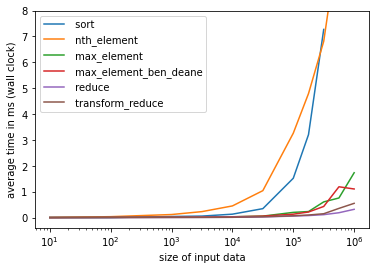

In [36]:
data_par.plot(x="size", logx=True, xlabel="size of input data", ylabel="average time in ms (wall clock)", ylim=[-0.4, 8]);

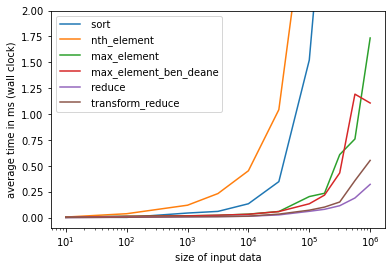

In [42]:
data_par.plot(x="size", logx=True, xlabel="size of input data", ylabel="average time in ms (wall clock)", ylim=[-0.1, 2]);